# <center> AIF360 Scikit-Learn Tutorial</center>

# Get data

- If you have a dataset that you want to evaluate bias in it, you can simply load with pandas and input in the library
- AIF360 has a module for loading datasets.
    - fetch_adult() - Adult Census Income Dataset.
    - fetch_german() - German Credit Dataset
    - fetch_bank() - Bank Marketing Dataset
    `from aif360.sklearn.datasets import fetch_adult`
- For the didactic purposes, I've downloaded the original dataset from Kaggle https://www.kaggle.com/uciml/adult-census-income

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 2000

In [5]:
df = pd.read_csv('data/adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Explore data

In [9]:
df.shape

(32561, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df = df.reset_index()

In [12]:
df.head()

,index,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## > Explore column by column:

In [14]:
df.columns

Index(['index', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [15]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <BarContainer object of 20 artists>)

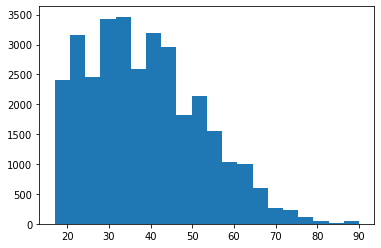

In [16]:
plt.hist(df['age'], bins=20)

It is well distributed. Seems like most of population is around 30 years old with 37/38 being the ages with most people. 

No transformations are needed for this column, I will use the raw value.

In [17]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [97]:
df['workclass'].value_counts(1)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64

Most people work in private companies.

I can one hot encode these features.

In [98]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

This seems like some sort of id. Let me check.

In [99]:
df['fnlwgt'].nunique()

21648

In [100]:
df.shape

(32561, 16)

Nope. But I have to check what it can mean later. 

I searched on Google and I got this: "The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents". Since I have no idea what this means, I will drop this column.

In [101]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Just education levels. I can make them into ordinal features and do a one hot encoding after.

In [102]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

Is this some sort of code for the previous column? Let me check.

In [103]:
df.groupby(['education', 'education.num'], as_index=False).count()\
        [['education', 'education.num']].sort_values('education.num')

,education,education.num
13,Preschool,1
3,1st-4th,2
4,5th-6th,3
5,7th-8th,4
6,9th,5
0,10th,6
1,11th,7
2,12th,8
11,HS-grad,9
15,Some-college,10


Looks like it is. This way, I may not need this column.

In [104]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [105]:
df['marital.status'].value_counts(1)

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital.status, dtype: float64

One hot encode this.

In [106]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [107]:
df['occupation'].nunique()

15

Occupation will probably impact on what we are trying to predict: income. Good thing is that the data is well distributed for this. 

Despite having so many occupations in the world this column has only these 15. I can one hot encode them.

In [108]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [109]:
df['relationship'].value_counts(1)

Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: relationship, dtype: float64

Don't know if this column means that the person is in a relationship with a "husband" or "wife" or if they are the 'husband' and 'wife'.

Let me see if I can find out by using the column 'sex'.

In [110]:
df.groupby(['relationship', 'sex'])['index'].count()

relationship    sex   
Husband         Female        1
                Male      13192
Not-in-family   Female     3875
                Male       4430
Other-relative  Female      430
                Male        551
Own-child       Female     2245
                Male       2823
Unmarried       Female     2654
                Male        792
Wife            Female     1566
                Male          2
Name: index, dtype: int64

It looks like this means that they are 'husbands' and 'wives'. However, I already have this information in the 'marital.status' column.

In [18]:
df.groupby(['relationship', 'marital.status'])['index'].count()

relationship    marital.status       
Husband         Married-AF-spouse            9
                Married-civ-spouse       13184
Not-in-family   Divorced                  2404
                Married-civ-spouse          17
                Married-spouse-absent      211
                Never-married             4706
                Separated                  420
                Widowed                    547
Other-relative  Divorced                   110
                Married-AF-spouse            1
                Married-civ-spouse         124
                Married-spouse-absent       32
                Never-married              611
                Separated                   55
                Widowed                     48
Own-child       Divorced                   328
                Married-AF-spouse            1
                Married-civ-spouse          95
                Married-spouse-absent       45
                Never-married             4485
                Separa

Yep. I'll delete it.

In [111]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [112]:
df['race'].value_counts(1)

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64

There are much more white people than the rest. Maybe this can be a good `sens. attribute`.

One hot encode.

In [113]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [114]:
df['sex'].value_counts(1)

Male      0.669205
Female    0.330795
Name: sex, dtype: float64

There are more men than women. Maybe this can be a good `sens. attribute`.

In [115]:
df['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [116]:
df['capital.gain'].value_counts().head(10)

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
Name: capital.gain, dtype: int64

In [117]:
df['capital.gain'].value_counts(1).head(10)

0        0.916710
15024    0.010657
7688     0.008722
7298     0.007555
99999    0.004883
5178     0.002979
3103     0.002979
4386     0.002150
5013     0.002119
8614     0.001689
Name: capital.gain, dtype: float64

Have to know what this column mean later. But why are there much more zeroes than the rest?

I googled it and I got: "Capital gain refers to an increase in a capital asset's value and is considered to be realized when the asset is sold". This way, it may be an important feature for the model to use.

In [21]:
df['capital.loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

In [23]:
df['capital.loss'].value_counts().head(10)

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
Name: capital.loss, dtype: int64

In [22]:
df['capital.loss'].value_counts(1).head(10)

0       0.953349
1902    0.006204
1977    0.005160
1887    0.004883
1848    0.001566
1485    0.001566
2415    0.001505
1602    0.001443
1740    0.001290
1590    0.001228
Name: capital.loss, dtype: float64

Same as above. I can normalize them both and use the value as raw feature.

In [36]:
df['hours.per.week'].value_counts(1).head(10)

40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
20    0.037591
30    0.035288
55    0.021314
25    0.020700
48    0.015878
Name: hours.per.week, dtype: float64

I can turn them into ordinal features and then one hot encode them.

In [38]:
df['native.country'].value_counts(1)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [39]:
df['native.country'].nunique()

42

Much more people from USA. This can also be a `sens attribute`.

I can turn this into binary (if from USA 1, if not 0) or separate by region and then OHE them (NA, SA, Euro, Africa, Asia, etc). 

In [40]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

I believe this is the label we can use. 1 would be >50K and 0 would be <=50K.

## Check what does the '?' mean

In [41]:
df[df=='?'].count()/df.shape[0]

index             0.000000
age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

This is the percentage of appearances of '?' value. Maybe this can be considered a null value, this way I can just drop the rows with this value so I won't have to deal with them.

# Evaluate bias in the original dataset

The columns selected as good `sens attr` were:
- age
- sex
- race
- native.country

For each, we'll run the fairness metric `disparate_impact_ratio` which can be applied BEFORE training a model. <br><br>
<center>--- FORMULA ---</center>
<center>P_unprivileged_class(1)/P_privileged_class(1) (_Probability of the unprivileged class to receive a potitive outcome  divided by the probability of the privileged class to receive a potitive outcome_)</center>
<br>

How to interpret this metric:
- Its output value ranges from 0 to 1
- The higher its value fairer is your dataset/model related to that protected attribute. 
- Despite 1 being the perfect value for it (which means your dataset/model is fairest), a value greater than 0.8 is considered an acceptable bias.

Let's start with 'sex' column.

Import the AIF360 module which contains the metrics.

In [96]:
from aif360.sklearn import metrics as mt

But first, we need to configure our dataset to the input accepted by the library. 

To use AIF360 with sklearn, we need to:
1. Binarize the sensitive attribute with: 1 being set to be the privileged group and 0 as the unprivileged.
2. Binarize the label column with: 1 being the positive outcome and 0 else.
3. Turn the sensitive attribute column into the index of the dataset

Let's first binarize the y label column.

In [126]:
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

Now let's binarize the sens. attr column.

In [127]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='Male' else 0)

Now, for the purpose of readibility, let's separate these two into one variable `y`.

In [128]:
y = df.set_index('sex')['income']

In [129]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [130]:
mt.disparate_impact_ratio(y, prot_attr='sex')

0.3580225496813511

The metric presents a really low value for this attribute. Far even from 0.8 which is the acceptable value. 

Now, since we are going to repeat this for the other protected attribute columns, let's create this function to make the development easier. 

In [131]:
def set_sens_attr(df, label_col, prot_tuple):
    """To use AIF360 with sklearn, we need to turn the sensitive 
    attribute column into the index of the dataset. This function will
    binarize the prot_attr column and set it as the index. 
    
    :param df: [pd.DataFrame]
    :param label_col: [str], the y label column name 
    :param prot_tuple: [tuple], tuple containing the protected attribute 
        column name and the threshold to make the binarization. Apply
        needed configurations depending if the threshold is a category
        or a number
    :return y: [pd.DataFrame], a dataframe consisting of only the label
        column and the sensitive attribute set as index
    """
    
    threshold = prot_tuple[1]
    prot_attr = prot_tuple[0]
    df = df.copy()
    
    if isinstance(threshold, str):
        df[prot_attr] = df[prot_attr].apply(lambda x: 1 if x==threshold else 0)
    else:
        df[prot_attr] = df[prot_attr].apply(lambda x: 1 if x>=threshold else 0)
    
    y = df.set_index(prot_attr)[label_col]
    
    return y

Let's do it for 'race'.

In [132]:
y = set_sens_attr(df, 'income', ('race', 'White'))

In [133]:
mt.disparate_impact_ratio(y)

0.5963484039832201

The metric for "race" is higher than for "sex", however, it still shows that the "race" is an attribute that has a lot of bias.

Let's do it for 'native.country'.


In [134]:
y = set_sens_attr(df, 'income', ('native.country', 'United-States'))

In [135]:
mt.disparate_impact_ratio(y)

0.8037180456803203

This feature presents an acceptable score, this way I will not pay attention to it in bias mitigation.

# Transform data

Let's apply the transformations I listed on the Exploration section.

In [263]:
transformed = df.copy().drop('index', axis=1)

Clean '?' and nan values.

In [264]:
transformed = transformed[transformed!='?']
transformed = transformed.dropna()

Drop not needed columns.

In [265]:
drop_cols = ['fnlwgt', 'education']
transformed = transformed.drop(drop_cols, axis=1)

One hot encode the columns.

In [266]:
ohe_cols = ['workclass', 'marital.status',
           'occupation', 'relationship']
for col in ohe_cols:
    transformed = transformed.join(pd.get_dummies(transformed[col], 
                                                  prefix=col))\
                                                .drop(col, axis=1)

Normalize other columns.

In [267]:
norm_cols = ['capital.loss', 'capital.gain']
for col in norm_cols:
    transformed[col] = transformed[col]/transformed[col].max()

Binarize columns.

In [268]:
transformed['sex'] = transformed['sex'].apply(lambda x: 1 if x=='Male' else 0)
transformed['race'] = transformed['race'].apply(lambda x: 1 if x=='White' else 0)
transformed['native.country'] = transformed['native.country'].apply(lambda x: 1 if x=='United-States' else 0)
transformed['income'] = transformed['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [269]:
transformed.head()

,age,education.num,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,9,1,0,0.0,1.000000,18,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,54,4,1,0,0.0,0.895317,40,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,41,10,1,0,0.0,0.895317,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,34,9,1,0,0.0,0.865473,45,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6,38,6,1,1,0.0,0.865473,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [270]:
transformed.shape

(30162, 43)

I got 43 features for my model. Let's just quick explore this data.

# Explore transformed data

In [54]:
transformed.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
education.num,30162.0,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
race,30162.0,0.859790,0.347210,0.0,1.0,1.0,1.0,1.0
sex,30162.0,0.675685,0.468126,0.0,0.0,1.0,1.0,1.0
capital.gain,30162.0,0.010920,0.074064,0.0,0.0,0.0,0.0,1.0
capital.loss,30162.0,0.020288,0.092814,0.0,0.0,0.0,0.0,1.0
hours.per.week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.0
native.country,30162.0,0.911876,0.283480,0.0,1.0,1.0,1.0,1.0
income,30162.0,0.248922,0.432396,0.0,0.0,0.0,0.0,1.0
workclass_Federal-gov,30162.0,0.031265,0.174035,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

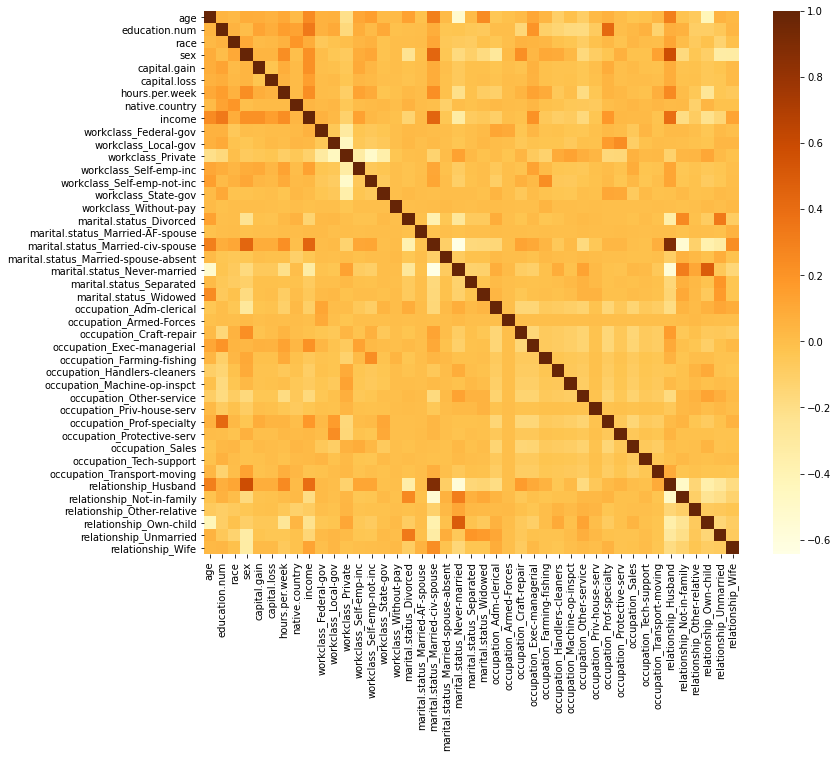

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(transformed.corr(), cmap='YlOrBr')

<AxesSubplot:>

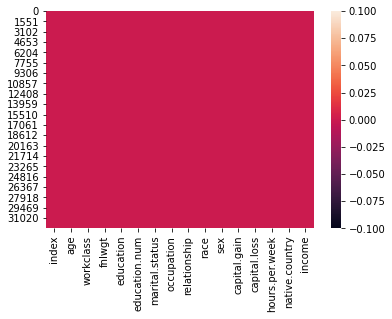

In [76]:
sns.heatmap(df.isna())

All good.

# Separate data (train/test, X/y)

Set index.

In [271]:
transformed = transformed.set_index('sex')

Separate X and y (train and test).

In [272]:
y = transformed['income']
X = transformed.drop('income', axis=1)

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1234567)

# Train a model

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [276]:
estimator = LogisticRegression(solver='lbfgs')
y_pred = estimator.fit(X_train, y_train).predict(X_test)

/home/paollamagalhaes/miniconda3/envs/aif360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Evaluate performance

In [277]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.869614,0.916093,0.892248,6829.00000
1,0.691105,0.577477,0.629202,2220.00000
accuracy,0.833020,0.833020,0.833020,0.83302
macro avg,0.780359,0.746785,0.760725,9049.00000
weighted avg,0.825820,0.833020,0.827715,9049.00000


# Evaluate fairness

In [278]:
import pandas as pd

def fairness_report(y_test, y_pred, prot_attr, return_df=True):
    fairness_report_dict = {
        prot_attr: {"disparate_impact_ratio": 
                        mt.disparate_impact_ratio(y_test, y_pred, prot_attr=prot_attr),
                    "statistical_parity_difference": 
                        mt.statistical_parity_difference(y_test, y_pred, prot_attr=prot_attr),
                    "equal_opportunity_difference": 
                        mt.equal_opportunity_difference(y_test, y_pred, prot_attr=prot_attr),
                    "average_odds_difference": 
                        mt.average_odds_difference(y_test, y_pred, prot_attr=prot_attr)}}
    if return_df:
        return pd.DataFrame(fairness_report_dict)
    else:
        return fairness_report_dict

In [279]:
fairness_report(y_test, y_pred, prot_attr='sex')

,sex
average_odds_difference,-0.093343
disparate_impact_ratio,0.338628
equal_opportunity_difference,-0.105511
statistical_parity_difference,-0.171693


Seems like it is failing on 2 fairness metrics.

# Mitigate bias

## Using Preprocessing

In [280]:
from aif360.sklearn.preprocessing import ReweighingMeta

In [281]:
rew = ReweighingMeta(estimator=estimator)

params = {'estimator__C': [1, 10], 'reweigher__prot_attr': ['sex']}

clf = GridSearchCV(rew, params, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

/home/paollamagalhaes/miniconda3/envs/aif360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/paollamagalhaes/miniconda3/envs/aif360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

GridSearchCV(cv=5, estimator=ReweighingMeta(estimator=LogisticRegression()),
             param_grid={'estimator__C': [1, 10],
                         'reweigher__prot_attr': ['sex']},
             scoring='accuracy')

In [282]:
y_pred = clf.predict(X_test)

### Evaluate performance

In [283]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.863848,0.921658,0.891817,6829.000000
1,0.696540,0.553153,0.616621,2220.000000
accuracy,0.831252,0.831252,0.831252,0.831252
macro avg,0.780194,0.737405,0.754219,9049.000000
weighted avg,0.822803,0.831252,0.824303,9049.000000


### Evaluate fairness

In [284]:
fairness_report(y_test, y_pred, prot_attr='sex')

,sex
average_odds_difference,0.051906
disparate_impact_ratio,0.609058
equal_opportunity_difference,0.127800
statistical_parity_difference,-0.086982


## Using Inprocessing

In [285]:
from aif360.sklearn.inprocessing import AdversarialDebiasing

In [286]:
adv_deb = AdversarialDebiasing(prot_attr='sex', random_state=1234567)
adv_deb.fit(X_train, y_train)

AdversarialDebiasing(prot_attr='sex', random_state=1234567)

In [287]:
y_pred = adv_deb.predict(X_test)

### Evaluate performance

In [288]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.860893,0.946112,0.901493,6829.000000
1,0.761658,0.529730,0.624867,2220.000000
accuracy,0.843961,0.843961,0.843961,0.843961
macro avg,0.811275,0.737921,0.763180,9049.000000
weighted avg,0.836547,0.843961,0.833628,9049.000000


### Evaluate fairness 

In [289]:
fairness_report(y_test, y_pred, prot_attr='sex')

,sex
average_odds_difference,0.102165
disparate_impact_ratio,0.704891
equal_opportunity_difference,0.203286
statistical_parity_difference,-0.055569


### Close instance

In [193]:
# adv_deb.sess_.close()  # AdversarialDebiasing creates a TensorFlow session 
                       # which we should close when we're finished to free up resources

## Using Postprocessing

In [290]:
from aif360.sklearn.postprocessing import CalibratedEqualizedOdds, PostProcessingMeta

In [291]:
cal_eq_odds = CalibratedEqualizedOdds('sex', cost_constraint='fnr', random_state=1234567)
postproc = PostProcessingMeta(estimator=estimator, postprocessor=cal_eq_odds, random_state=1234567)

postproc.fit(X_train, y_train)

/home/paollamagalhaes/miniconda3/envs/aif360/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


PostProcessingMeta(estimator=LogisticRegression(),
                   postprocessor=CalibratedEqualizedOdds(cost_constraint='fnr',
                                                         prot_attr='sex',
                                                         random_state=1234567))

In [292]:
y_pred = postproc.predict(X_test)

### Evaluate performance

In [293]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.813686,0.954166,0.878345,6829.00000
1,0.699328,0.327928,0.446489,2220.00000
accuracy,0.800530,0.800530,0.800530,0.80053
macro avg,0.756507,0.641047,0.662417,9049.00000
weighted avg,0.785631,0.800530,0.772397,9049.00000


### Evaluate fairness 

In [294]:
fairness_report(y_test, y_pred, prot_attr='sex')

,sex
average_odds_difference,0.047157
disparate_impact_ratio,0.564673
equal_opportunity_difference,0.125682
statistical_parity_difference,-0.058128


# Bias mitigation algoritms comparison

In [297]:
algos = [estimator, clf, postproc, adv_deb]
algo_names = ['suppression', 'preprocessing', 'inprocessing', 'postprocessing']
sex_fairness = pd.DataFrame(index=fairness_report(y_test, y_pred, prot_attr='sex').index)
for i, algo in enumerate(algos):
    y_pred = algo.predict(X_test)
    sex_fairness = pd.merge(sex_fairness, 
                             fairness_report(y_test, y_pred, prot_attr='sex'), 
                             left_index=True, right_index=True, suffixes=('', '_' + algo_names[i]))

In [298]:
sex_fairness

,sex,sex_preprocessing,sex_inprocessing,sex_postprocessing
average_odds_difference,-0.093343,0.051906,0.047157,0.102165
disparate_impact_ratio,0.338628,0.609058,0.564673,0.704891
equal_opportunity_difference,-0.105511,0.127800,0.125682,0.203286
statistical_parity_difference,-0.171693,-0.086982,-0.058128,-0.055569
